# Predictions using TF-lite
* Remove Tensorflow dependency

## Install `tflite-runtime`

In [1]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.3 MB/s eta 0:00:0000:0100:010m


## Dependencies

In [67]:
import tflite_runtime.interpreter as tflite
from PIL import Image
from io import BytesIO
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

## Helper functions
* preprocess image
* predict facial emotion

In [68]:
def prepare_input(url):
    
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    img = img.resize((48, 48), Image.NEAREST)

    x = np.array(img)
    if x.ndim > 2:
        x = x[:,:,0]
    else: return x
    X = np.array([x])
    X = X/255.
    X = np.expand_dims(np.float32(X), axis=-1)

    return X

def predict(url):
    X = prepare_input(url)

    interpreter.set_tensor(input_index, X)
    interpreter.invoke()
    preds = interpreter.get_tensor(output_index)

    float_predictions = preds[0].tolist()

    return dict(zip(class_labels, float_predictions))

## Test URL

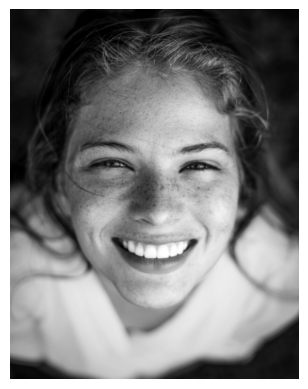

In [76]:
url = 'https://i.pinimg.com/originals/6e/cd/8a/6ecd8a85b2459b07d2889667aa9b6a0c.jpg'
with request.urlopen(url) as resp:
        buffer = resp.read()
stream = BytesIO(buffer)
img = Image.open(stream)

plt.imshow(img);
plt.axis('off');

## Loading model

In [77]:
interpreter = tflite.Interpreter(model_path='../models/emotion_classifier.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

class_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

## Prediction using model

In [78]:
predict(url)

{'Anger': 0.036347344517707825,
 'Disgust': 0.00085559266153723,
 'Fear': 0.004966392181813717,
 'Happy': 0.7519930005073547,
 'Neutral': 0.003033227752894163,
 'Sadness': 0.0062875449657440186,
 'Surprise': 0.1965169459581375}